# Titanic Survivor, Disaster Management Random Forest Classifier
#### The effort of this project is to find the optimized classification model through the implmentation of various machine learning model techniques.
#### In this iteration we will focus specifically on the Random Forest model, while trying to predict the survivability of Titanic Survivors.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyarrow.csv as csv ## This helps reads csv's
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




In [2]:
## Load Data

df = pd.read_csv('/Users/joshuahernandez8/Desktop/FinalProject_Titanic-main/final_titanic_data.csv')

## Data Pre-Processing and Understanding

In [4]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_txt,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,no,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,yes,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,yes,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no,0


In [5]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [3]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Survived_txt     object
Family            int64
dtype: object

In [13]:
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Survived_txt      0
Family            0
dtype: int64

#### While understanding the data, it is clear that the missing values within the dataset are not within the scope of the target variable

#### However the variable with the most substantial null values is that of the 'Cabin' variable, which designates which cabin the passenger was in. This will not impact the model, given we know what class each passenger was in

In [14]:
df.value_counts

<bound method DataFrame.value_counts of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                           

## Data Exploration/ Viz

### This step will help us get a better understanding of our target variable 'Survived'

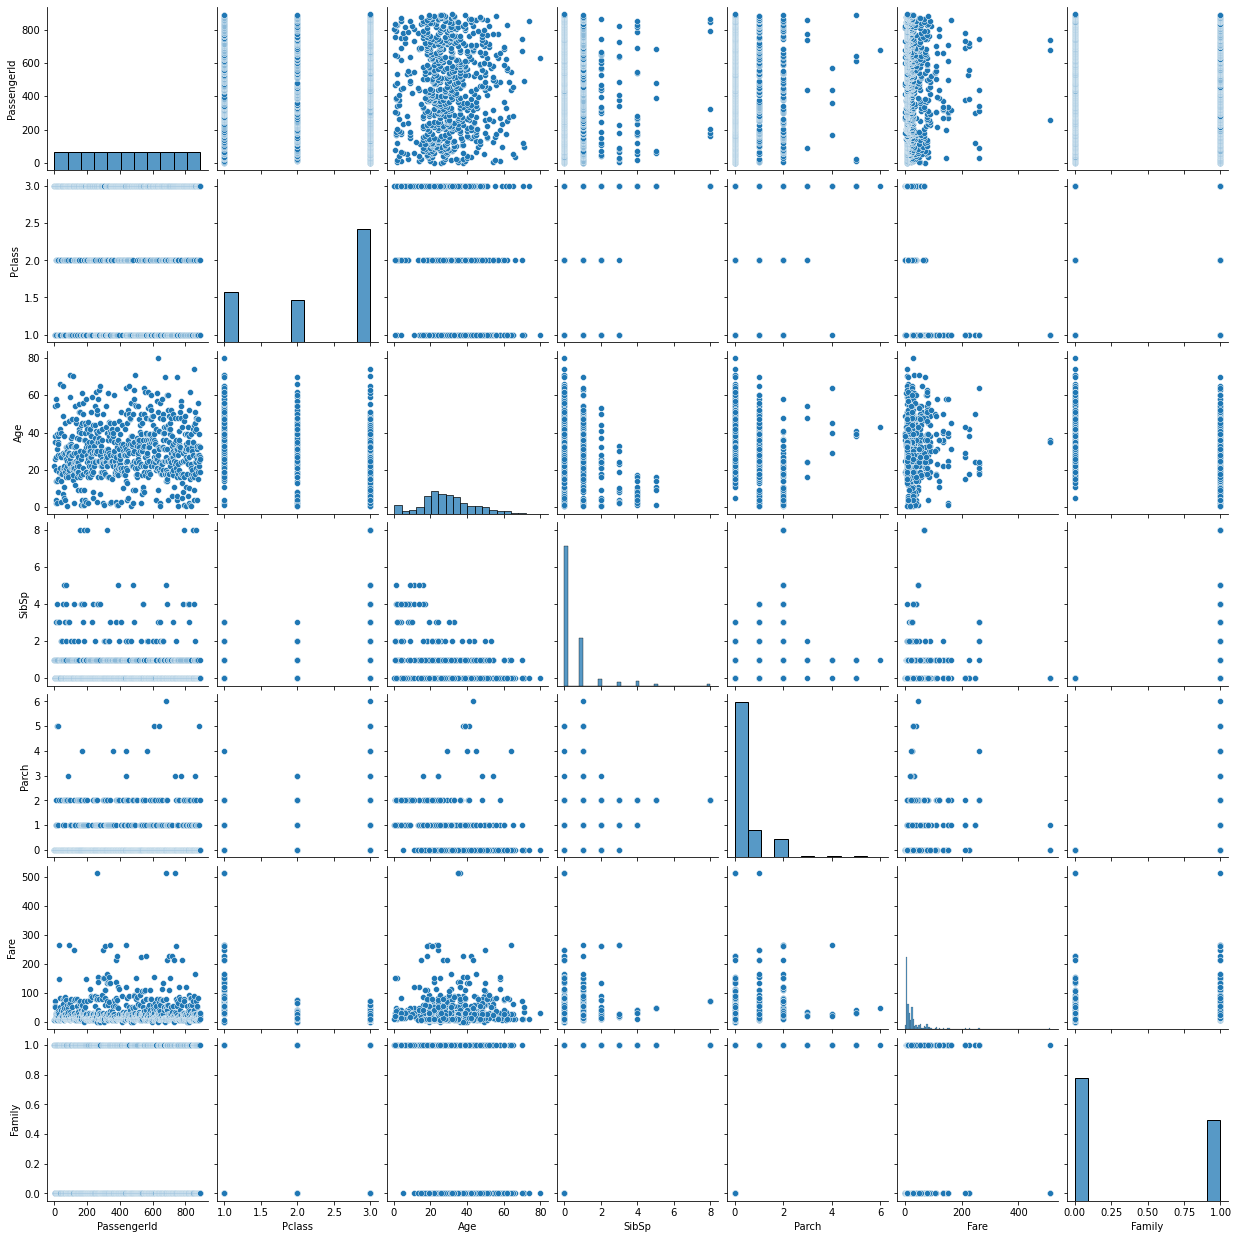

In [18]:
sns.pairplot(df.drop(['Survived'], axis=1))

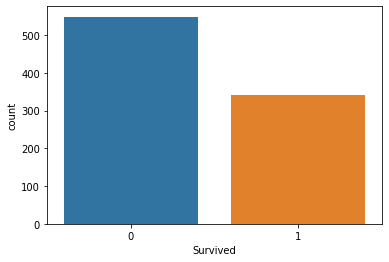

In [17]:
ax = sns.countplot( x= 'Survived', data = df)

### 0 Means they DID NOT survive, 1 means they DID survive

<AxesSubplot:xlabel='Pclass', ylabel='count'>

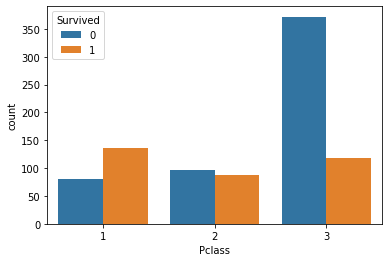

In [26]:
sns.countplot(x='Pclass', hue='Survived', data=df)

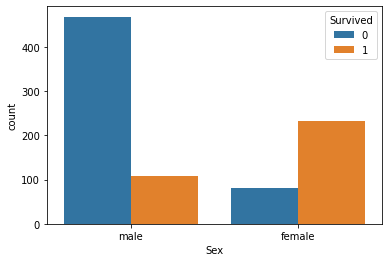

In [22]:
ax = sns.countplot( x= 'Sex', hue= 'Survived', data = df)

### Label Encoding
     This will help us convert our cateogrical variables into integers, so they can be ingested into the algorithm

In [4]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

for col in df.columns:
    df[col] = enc.fit(df[col]).transform(df[col])

In [5]:
df.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name            int64
Sex             int64
Age             int64
SibSp           int64
Parch           int64
Ticket          int64
Fare            int64
Cabin           int64
Embarked        int64
Survived_txt    int64
Family          int64
dtype: object

## Random Forest Model

### Implementing the Model

In [6]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.20, random_state = 1)

print(df_test.shape)
print(df_train.shape)

(179, 14)
(712, 14)


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived_txt',
       'Family'],
      dtype='object')

In [8]:

x= df_train[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked',
       'Family']]

In [9]:
y = df_train['Survived']

In [10]:
x_test = df_test[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked',
       'Family']]

y_test = df_test['Survived']

### Applying the Model and Evaluating the Model

In [11]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(x, y)
y_pred = classifier.predict(x_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[99  7]
 [30 43]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       106
           1       0.86      0.59      0.70        73

    accuracy                           0.79       179
   macro avg       0.81      0.76      0.77       179
weighted avg       0.81      0.79      0.78       179

0.7932960893854749


## Random Forest: 79.32%

The implementation of this Random Forest Classifier provides a 79% accuracy on passenger survivability 